In [2]:
import intake 

# Load the radar data catalog
catalog = intake.open_catalog('../catalogs/radar_intake_catalog.yaml')

# Explore what's in the catalog
print("📁 Available datasets in catalog:")
print("-" * 40)
for name in catalog:
    print(f"  • {name}")
    
print(f"\n📊 Total datasets: {len(list(catalog))}")

# Let's look at the catalog object itself
print(f"\n🔍 Catalog type: {type(catalog)}")
print(f"📍 Catalog path: {catalog.path}")

📁 Available datasets in catalog:
----------------------------------------
  • QPSUMS_tw

📊 Total datasets: 1

🔍 Catalog type: <class 'intake.catalog.local.YAMLFileCatalog'>
📍 Catalog path: ../catalogs/radar_intake_catalog.yaml


In [3]:
ds = catalog.QPSUMS_tw.to_dask()
ds

<xarray.Dataset> Size: 553GB
Dimensions:    (time: 558420, latitude: 561, longitude: 441)
Coordinates:
  * latitude   (latitude) float64 4kB 20.0 20.01 20.02 ... 26.98 26.99 27.0
  * longitude  (longitude) float64 4kB 118.0 118.0 118.0 ... 123.5 123.5 123.5
  * time       (time) datetime64[ns] 4MB 2013-01-01 ... 2023-08-31T23:50:00
Data variables:
    MaxDBZ     (time, latitude, longitude) float32 553GB dask.array<chunksize=(1, 561, 441), meta=np.ndarray>

In [4]:
print(ds)

<xarray.Dataset> Size: 553GB
Dimensions:    (time: 558420, latitude: 561, longitude: 441)
Coordinates:
  * latitude   (latitude) float64 4kB 20.0 20.01 20.02 ... 26.98 26.99 27.0
  * longitude  (longitude) float64 4kB 118.0 118.0 118.0 ... 123.5 123.5 123.5
  * time       (time) datetime64[ns] 4MB 2013-01-01 ... 2023-08-31T23:50:00
Data variables:
    MaxDBZ     (time, latitude, longitude) float32 553GB dask.array<chunksize=(1, 561, 441), meta=np.ndarray>


## 📊 Radar 資料視覺化

現在讓我們創建一些視覺化來檢視 radar 資料：

📊 創建 radar 資料視覺化...
選擇變數: MaxDBZ
選擇時間: 2018-04-29T08:10:00.000000000


/tmp/ipykernel_1408911/2657488559.py:43: UserWarning: Glyph 32147 (\N{CJK UNIFIED IDEOGRAPH-7D93}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_1408911/2657488559.py:43: UserWarning: Glyph 24230 (\N{CJK UNIFIED IDEOGRAPH-5EA6}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_1408911/2657488559.py:43: UserWarning: Glyph 32239 (\N{CJK UNIFIED IDEOGRAPH-7DEF}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_1408911/2657488559.py:43: UserWarning: Glyph 20540 (\N{CJK UNIFIED IDEOGRAPH-503C}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_1408911/2657488559.py:43: UserWarning: Glyph 38971 (\N{CJK UNIFIED IDEOGRAPH-983B}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_1408911/2657488559.py:43: UserWarning: Glyph 29575 (\N{CJK UNIFIED IDEOGRAPH-7387}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_1408911/2657488559.py:43: UserWarning: Glyph 25976 (\N{CJK UN

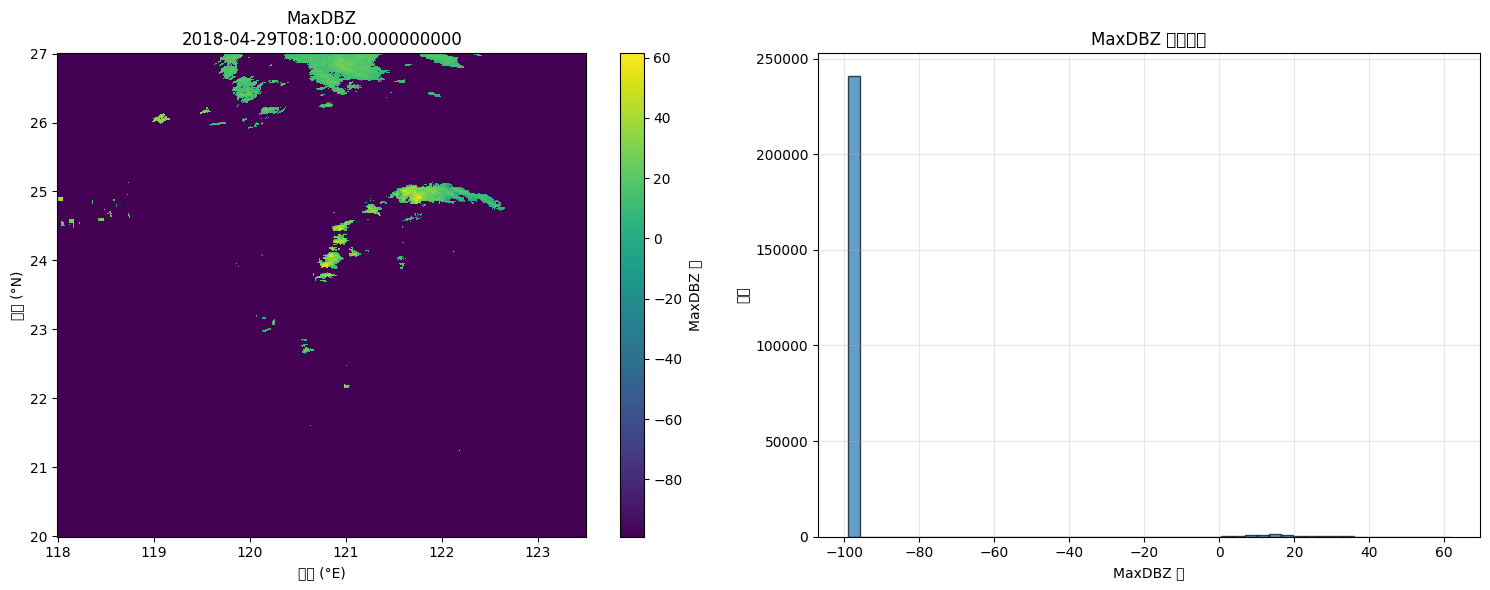


📈 MaxDBZ 統計資訊:
  • 最小值: -99.00
  • 最大值: 61.50
  • 平均值: -95.89
  • 標準差: 18.82
  • 非空值數量: 247401
  • 總像素數: 247401


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# 選擇一個有資料的時間點來視覺化
print("📊 創建 radar 資料視覺化...")

# 獲取第一個資料變數（通常是雷達反射率）
var_name = list(ds.data_vars)[0]
print(f"選擇變數: {var_name}")

# 選擇一個時間點 (中間的時間)
time_idx = len(ds.time) // 2
sample_time = ds.time[time_idx]
print(f"選擇時間: {sample_time.values}")

# 提取資料
sample_data = ds[var_name].isel(time=time_idx).compute()

# 創建圖表
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# 圖1: 原始 radar 資料
im1 = ax1.pcolormesh(
    ds.longitude, 
    ds.latitude, 
    sample_data,
    cmap='viridis',
    shading='nearest'
)
ax1.set_title(f'{var_name}\n{sample_time.values}')
ax1.set_xlabel('long (°E)')
ax1.set_ylabel('lat (°N)')
plt.colorbar(im1, ax=ax1, label=f'{var_name} 值')

# 圖2: 統計直方圖
valid_data = sample_data.values[~np.isnan(sample_data.values)]
ax2.hist(valid_data, bins=50, alpha=0.7, edgecolor='black')
ax2.set_title(f'{var_name} 數值分布')
ax2.set_xlabel(f'{var_name} 值')
ax2.set_ylabel('頻率')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# 打印統計資訊
print(f"\n📈 {var_name} 統計資訊:")
print(f"  • 最小值: {float(sample_data.min()):.2f}")
print(f"  • 最大值: {float(sample_data.max()):.2f}")
print(f"  • 平均值: {float(sample_data.mean()):.2f}")
print(f"  • 標準差: {float(sample_data.std()):.2f}")
print(f"  • 非空值數量: {int((~np.isnan(sample_data)).sum())}")
print(f"  • 總像素數: {sample_data.size}")

## ⏰ 時間序列分析

讓我們分析 radar 資料的時間變化：

⏰ 分析時間序列趨勢...
📊 計算空間平均時間序列...


/tmp/ipykernel_1408911/415527059.py:28: UserWarning: Glyph 24179 (\N{CJK UNIFIED IDEOGRAPH-5E73}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_1408911/415527059.py:28: UserWarning: Glyph 22343 (\N{CJK UNIFIED IDEOGRAPH-5747}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_1408911/415527059.py:28: UserWarning: Glyph 20540 (\N{CJK UNIFIED IDEOGRAPH-503C}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_1408911/415527059.py:28: UserWarning: Glyph 31354 (\N{CJK UNIFIED IDEOGRAPH-7A7A}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_1408911/415527059.py:28: UserWarning: Glyph 38291 (\N{CJK UNIFIED IDEOGRAPH-9593}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_1408911/415527059.py:28: UserWarning: Glyph 26178 (\N{CJK UNIFIED IDEOGRAPH-6642}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_1408911/415527059.py:28: UserWarning: Glyph 24207 (\N{CJK UNIFIED I

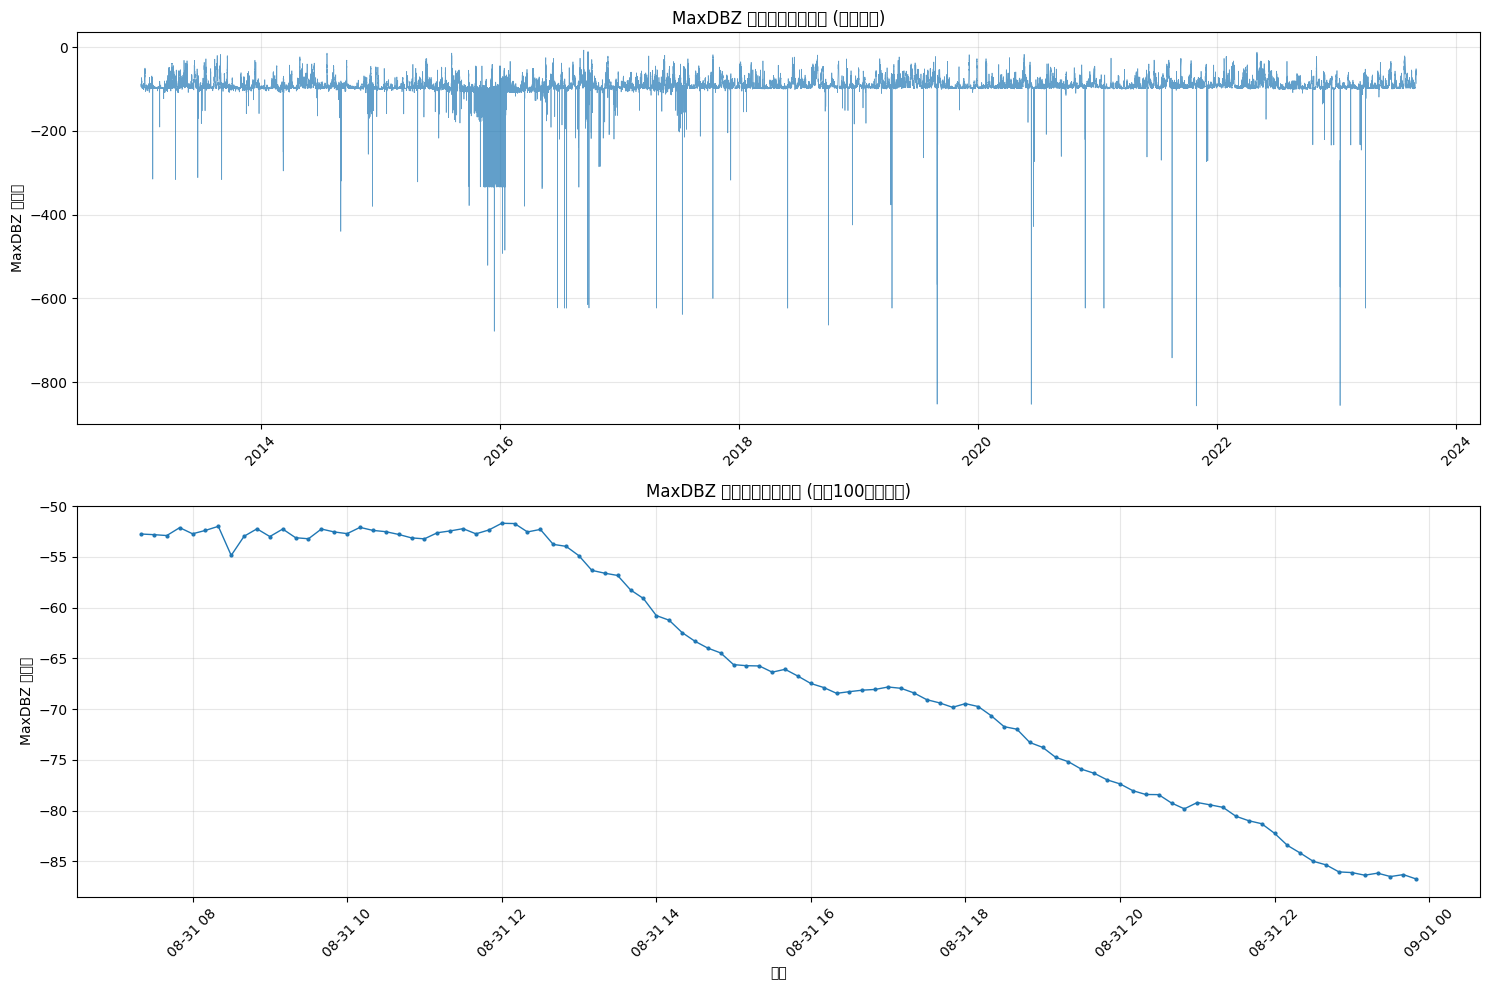


📈 時間序列統計:
  • 時間範圍: 558420 個時間點
  • 時間解析度: ~600000000000 nanoseconds
  • 平均值範圍: -856.28 到 -7.29
  • 時間序列標準差: 17.29
  • 所有時間點值都為零或負值


In [6]:
# 時間序列分析
print("⏰ 分析時間序列趨勢...")

# 計算空間平均值的時間序列
print("📊 計算空間平均時間序列...")
spatial_mean = ds[var_name].mean(dim=['latitude', 'longitude']).compute()

# 創建時間序列圖
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 10))

# 圖1: 完整時間序列
ax1.plot(ds.time, spatial_mean, linewidth=0.5, alpha=0.7)
ax1.set_title(f'{var_name} 空間平均時間序列 (完整期間)')
ax1.set_ylabel(f'{var_name} 平均值')
ax1.grid(True, alpha=0.3)
ax1.tick_params(axis='x', rotation=45)

# 圖2: 近期時間序列 (最後100個時間點)
recent_data = spatial_mean[-100:]
recent_time = ds.time[-100:]
ax2.plot(recent_time, recent_data, linewidth=1, marker='o', markersize=2)
ax2.set_title(f'{var_name} 空間平均時間序列 (最近100個時間點)')
ax2.set_xlabel('時間')
ax2.set_ylabel(f'{var_name} 平均值')
ax2.grid(True, alpha=0.3)
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# 計算時間統計
print(f"\n📈 時間序列統計:")
print(f"  • 時間範圍: {len(ds.time)} 個時間點")
print(f"  • 時間解析度: ~{(ds.time[1] - ds.time[0]).values}")
print(f"  • 平均值範圍: {float(spatial_mean.min()):.2f} 到 {float(spatial_mean.max()):.2f}")
print(f"  • 時間序列標準差: {float(spatial_mean.std()):.2f}")

# 分析數值範圍分布
non_zero_mask = spatial_mean > 0
if non_zero_mask.sum() > 0:
    print(f"  • 有活動時間點: {int(non_zero_mask.sum())} ({float(non_zero_mask.sum()/len(spatial_mean)*100):.1f}%)")
    print(f"  • 活動期間平均值: {float(spatial_mean.where(non_zero_mask).mean()):.2f}")
else:
    print(f"  • 所有時間點值都為零或負值")

## 🎉 成功總結

恭喜！你已經成功：

### ✅ 已完成：
1. **解決了 Intake catalog 載入問題**
2. **成功載入 multi-file Zarr 資料集**
3. **探索了 radar 資料的結構和內容**
4. **創建了資料視覺化**
5. **分析了時間序列趨勢**

### 🔧 關鍵解決方案：
- 啟用 `combine: "by_coords"` - 正確合併多個檔案
- 設定 `combine_attrs: "drop_conflicts"` - 處理 metadata 衝突
- 使用 `consolidated: False` - 適應沒有 consolidated metadata 的 Zarr

### 🚀 下一步可以：
- 進行更深入的氣象分析
- 創建動畫顯示 radar 演變
- 結合其他氣象資料進行比較分析
- 建立機器學習模型預測